# Time Series Modelling

# Challenge

In [1]:
# importing required liabraries

import pandas as pd               #for working with datasets
import matplotlib.pyplot as plt   #for visualization

## Task 1 : Data Preprocessing 

### Load the dataset and transform the data. Set te data column as the index column and visualize sales values.

In [2]:
#Loading the dataset

sales_df = pd.read_csv(r'C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv',parse_dates=['date']);

<AxesSubplot:xlabel='date'>

<Figure size 1000x800 with 0 Axes>

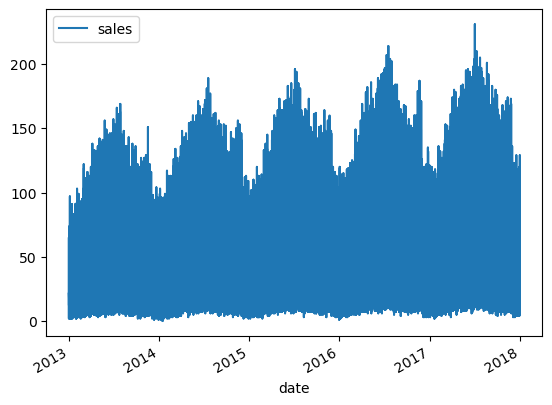

In [3]:
# Visualizing the sales values

plt.figure(figsize=(10,8))
sales_df.plot(x='date', y='sales', kind='line')

In [4]:
# setting date as index

sales_df = sales_df.set_index('date')

sales_df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


#### Interpretation :  From the visualization, it is seen that sales data is too much noisy.

## Task 2 : Data Decomposition

### Perform data decomposition to visualize the different components of the time series data 

In [5]:
sales = sales_df['sales']
sales.head()

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
Name: sales, dtype: int64

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose #splitting time series data into several components trend, seasonal and residual

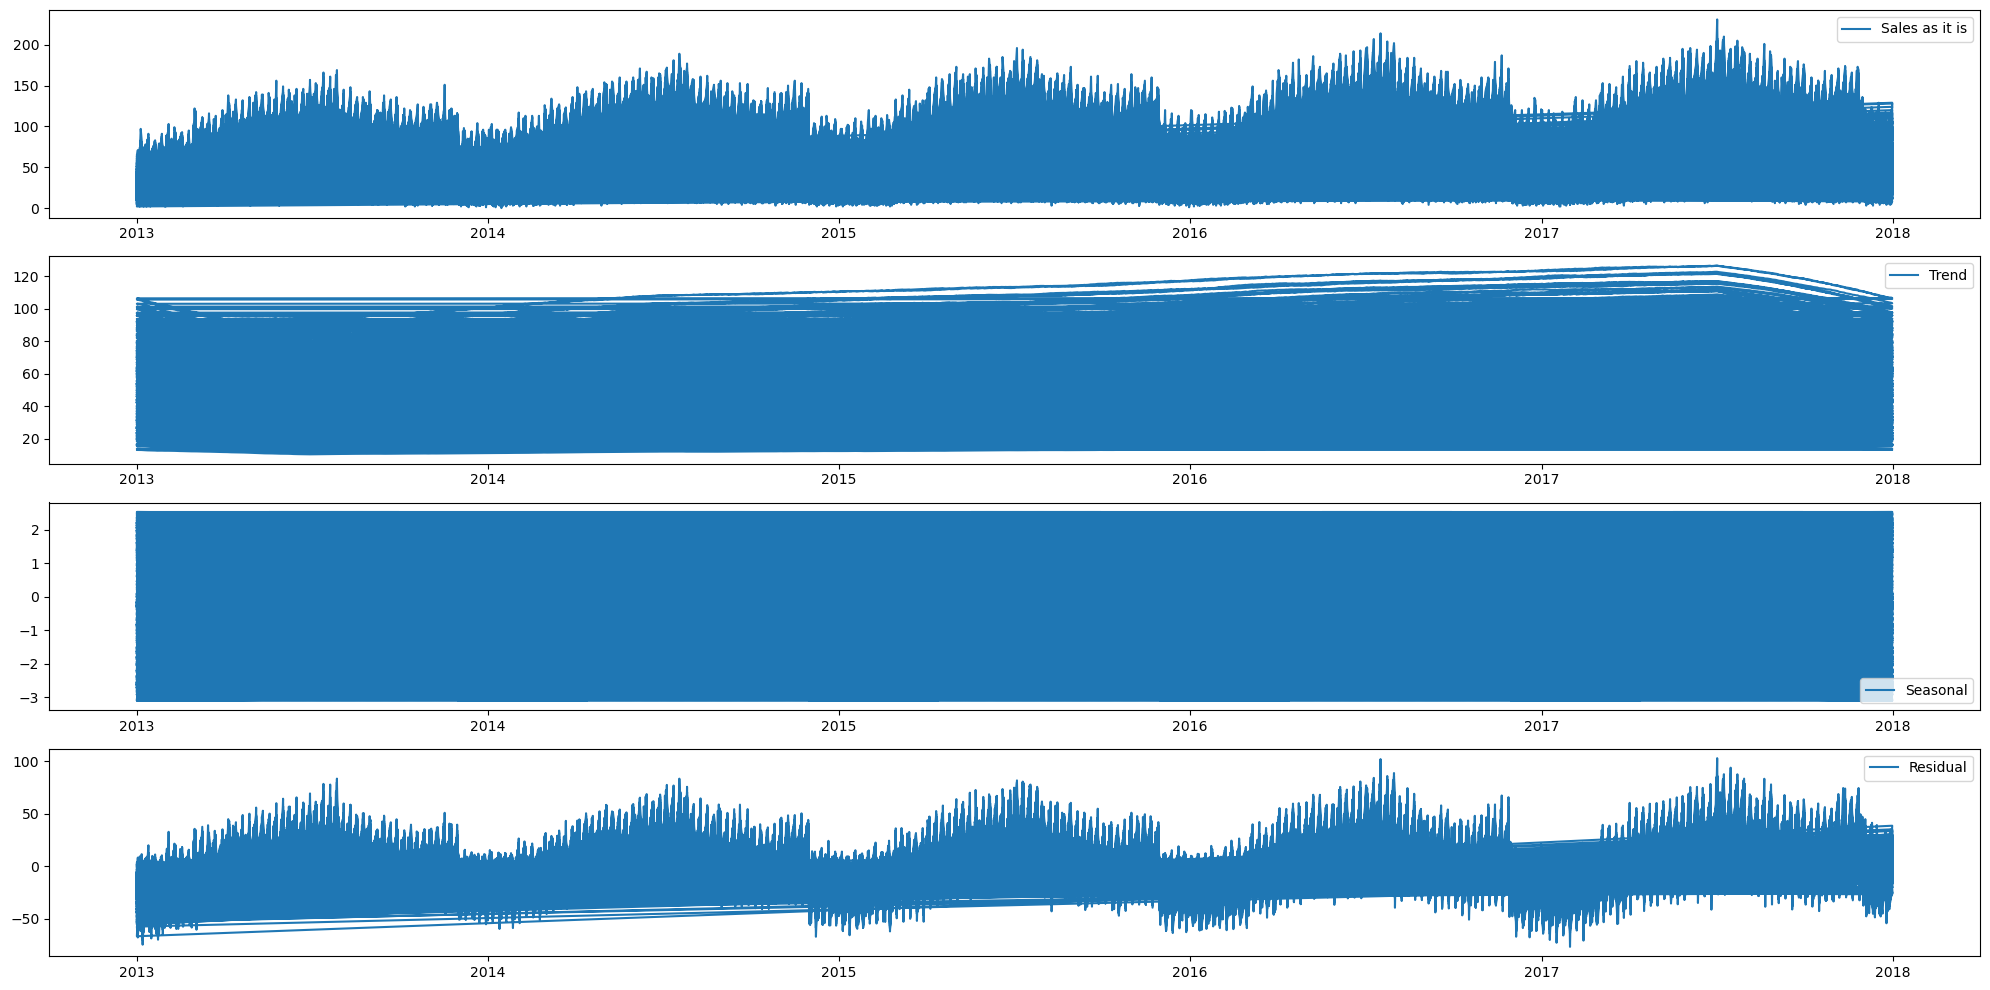

In [7]:
# different components of the Time series data
# period = 365 since the data is daily

decomposition = seasonal_decompose(sales, period=365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs

fig,ax = plt.subplots(4, 1, figsize=(20,10))

plt.subplot(411)   
plt.plot(sales, label='Sales as it is')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(d_trend, label='Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(d_seasonal, label='Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(d_residual, label='Residual')
plt.legend(loc = 'best')

plt.tight_layout()

### Resample the sales data with respect to month and further decompose the data. Write your observation from visualization of decomposed data before and after data resampling.

In [8]:
resample=sales_df['sales'].resample('M').mean()

In [9]:
resample=pd.DataFrame(resample)
resample.head()

,sales
date,
2013-01-31,29.348645
2013-02-28,32.815500
2013-03-31,39.831097
2013-04-30,45.484933
2013-05-31,49.241419


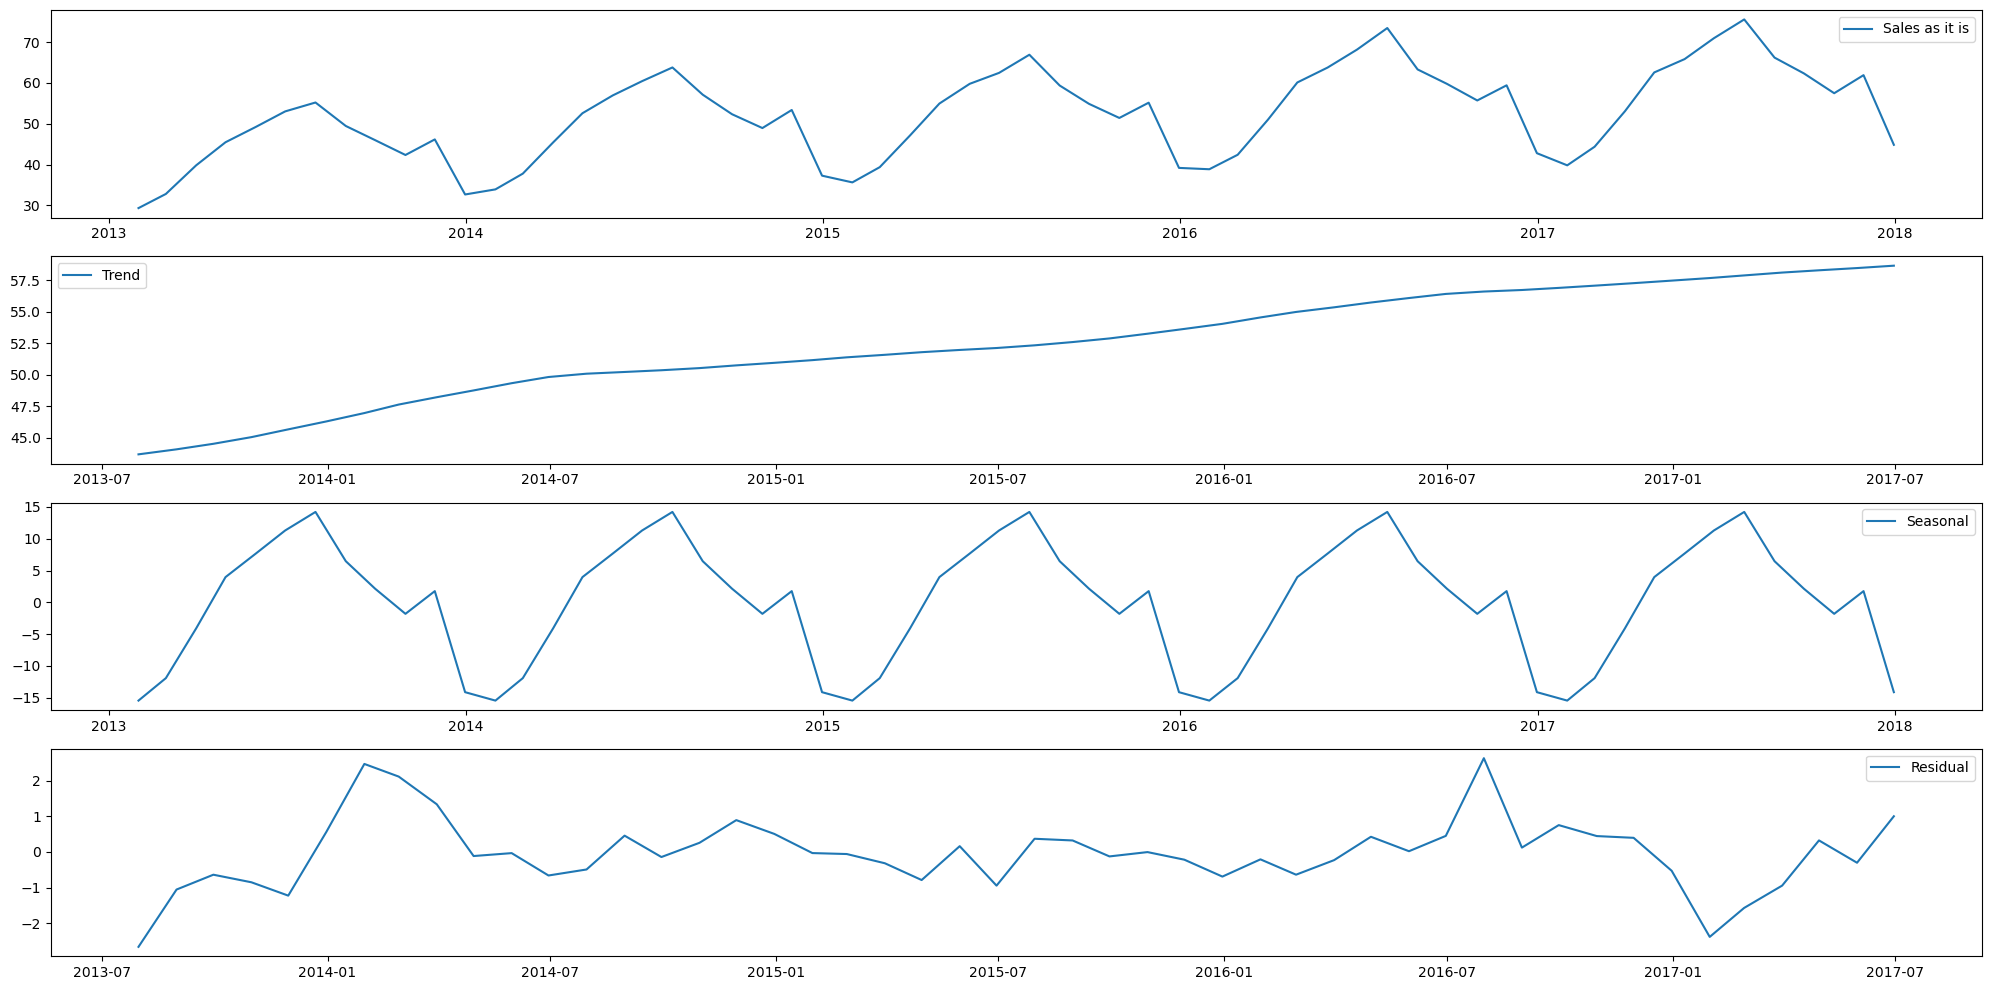

In [10]:
# different components of the Time series data
# period = 12 since the data is monthly

decomposition = seasonal_decompose(resample, period=12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs

fig,ax = plt.subplots(4, 1, figsize=(20,10))

plt.subplot(411)   
plt.plot(resample, label='Sales as it is')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(d_trend, label='Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(d_seasonal, label='Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(d_residual, label='Residual')
plt.legend(loc = 'best')

plt.tight_layout()

#### Interpretation : Any time series data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular. Before resampling data is too much noisy and it is difficult to interprete  components of the time series data. But after resampling,from the visuals data is showing upward trend and also seasonal trend as pattern is repeating after specific time interval.

## Task 3 : Stationary Check

### Perfrom Stationary Check for the data

In [11]:
# dickey fuller test for stationary check

from statsmodels.tsa.stattools import adfuller

In [12]:
# ADF test to determine data stationarity

def checkStationarity(data):
    pvalue = adfuller(data['sales'])[1]
    print(pvalue)


    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to Model Building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before Model Building".format(pvalue)
    
    return msg


In [13]:
# Calling function

print(checkStationarity(resample))

3.692387626163281e-06
pvalue=3.692387626163281e-06. Data is Stationary. Proceed to Model Building


#### Interpretation : If data is not stationary forecasting is not possible. A stationarity check on the dataset is done using a hypothesis test known as Augmented Dicky-Fuller test (ADF test).  adfuller() function will return p-value. If it is less than 0.05, then data is stationary. If p-value is greater than 0.05 data is non-stationary.

#### In this case value of p is less than 0.05. Hence data is stationary so need to make it stationary. Directly we can proceed with model building.

## Task 4 : Data Smoothing 

### Build the model for simple exponent smoothing for different values of alpha (0,0.2,0.6,0.8). Plot actual and forecasted data and write your interpretation. 

#### Simple Exponent Smoothing (no trend/seasonality) 

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing           #Liabrary to apply Simple Exponent Technique
from statsmodels.tsa.api import ExponentialSmoothing         #Liabrary to apply Double and Triple Exponent Technique

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Simple Exponent - when there is no trend/seasonality

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual' : data, 'forecast' : pdct})
    return(model,df)

In [16]:
data = resample['sales']

In [17]:
# creating forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model,df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

d_simple_exp

{0: date
 2013-01-31    29.348645
 2013-02-28    29.348645
 2013-03-31    29.348645
 2013-04-30    29.348645
 2013-05-31    29.348645
 2013-06-30    29.348645
 2013-07-31    29.348645
 2013-08-31    29.348645
 2013-09-30    29.348645
 2013-10-31    29.348645
 2013-11-30    29.348645
 2013-12-31    29.348645
 2014-01-31    29.348645
 2014-02-28    29.348645
 2014-03-31    29.348645
 2014-04-30    29.348645
 2014-05-31    29.348645
 2014-06-30    29.348645
 2014-07-31    29.348645
 2014-08-31    29.348645
 2014-09-30    29.348645
 2014-10-31    29.348645
 2014-11-30    29.348645
 2014-12-31    29.348645
 2015-01-31    29.348645
 2015-02-28    29.348645
 2015-03-31    29.348645
 2015-04-30    29.348645
 2015-05-31    29.348645
 2015-06-30    29.348645
 2015-07-31    29.348645
 2015-08-31    29.348645
 2015-09-30    29.348645
 2015-10-31    29.348645
 2015-11-30    29.348645
 2015-12-31    29.348645
 2016-01-31    29.348645
 2016-02-29    29.348645
 2016-03-31    29.348645
 2016-04-30    2

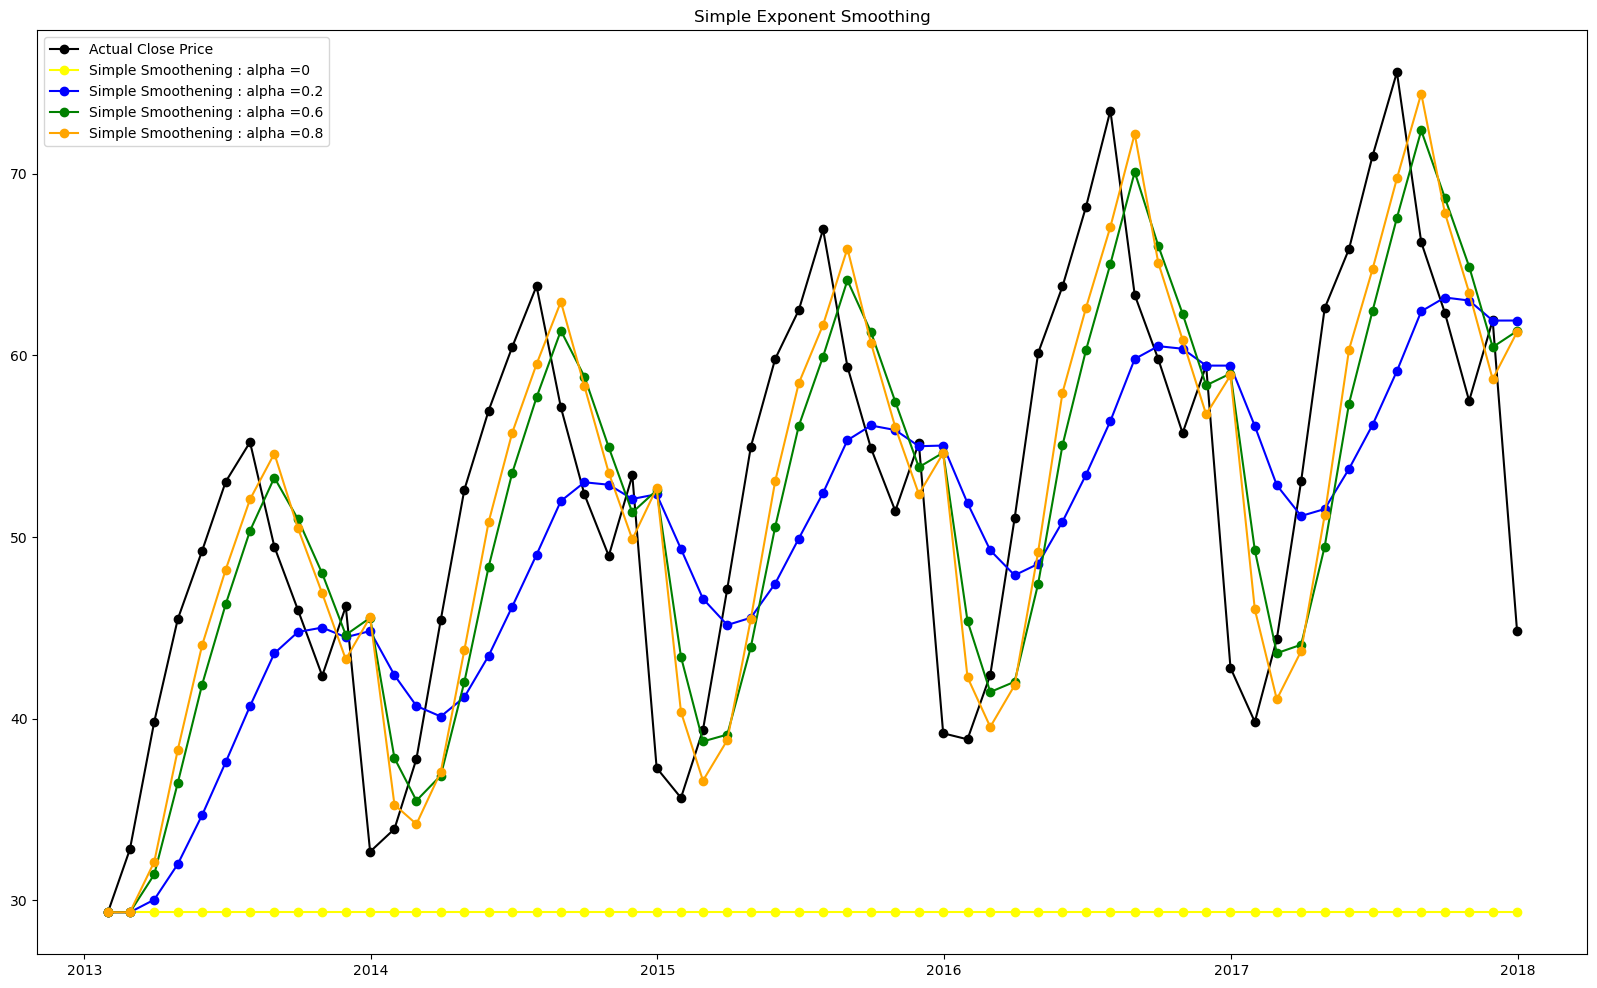

In [18]:
colors = ['yellow','blue','green','orange']

# plotting the actual and forecast data

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker='o', color=colors[i], label='Simple Smoothening : alpha =' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

#### Interpretation : In the above time series plot using simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line tahn the other line with respect to actual close price line. This line adjust to the changing condition more smoothly.  

### Build the model for double exponent smoothing. Plot actual and forecasted data and write your interpretation. 

#### Double Exponent Smoothing (trend, but no seasonality)

In [19]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)  # Setting value of smmothing parameters alpha and beta as 0.2 and 0.5 respectively

"""The additive model is useful when the seasonal variation is relatively constant over time.
The multiplicative model is useful when the seasonal variation increases over time."""

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-31    42.418287
2013-02-28    40.777277
2013-03-31    39.361662
2013-04-30    39.679233
2013-05-31    41.644627
2013-06-30    44.727919
2013-07-31    48.785416
2013-08-31    53.111145
2013-09-30    55.056994
2013-10-31    55.012424
2013-11-30    52.984900
2013-12-31    51.445161
2014-01-31    45.638911
2014-02-28    40.073548
2014-03-31    36.165196
2014-04-30    35.494812
2014-05-31    38.099549
2014-06-30    42.942473
2014-07-31    49.267443
2014-08-31    56.451577
2014-09-30    60.932875
2014-10-31    62.700061
2014-11-30    62.063541
2014-12-31    61.571593
2015-01-31    55.531794
2015-02-28    48.381892
2015-03-31    42.508516
2015-04-30    39.830446
2015-05-31    40.762659
2015-06-30    44.379309
2015-07-31    49.618353
2015-08-31    56.429707
2015-09-30    60.664872
2015-10-31    62.577015
2015-11-30    62.301970
2015-12-31    62.117502
2016-01-31    56.482369
2016-02-29    50.146497
2016-03-31    45.012991
2016-04-30    43.230096
2016-05-31    45.314854
2016-06-30 

Text(0.5, 1.0, 'Double Exponent Smoothing')

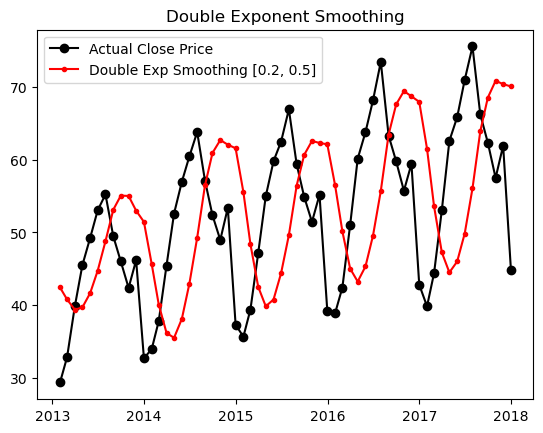

In [20]:
# plot the actual and smooth data

plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='red',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

### Build the model for triple exponent smoothing. Plot actual and forecasted data and write your interpretation. 

#### Triple Exponent Smoothing (trend and seasonality)

In [21]:
# build model

model =ExponentialSmoothing(data,trend='add',seasonal='add',seasonal_periods=12).fit()
print(model)

Text(0.5, 1.0, 'Triple Exponent Smoothing')

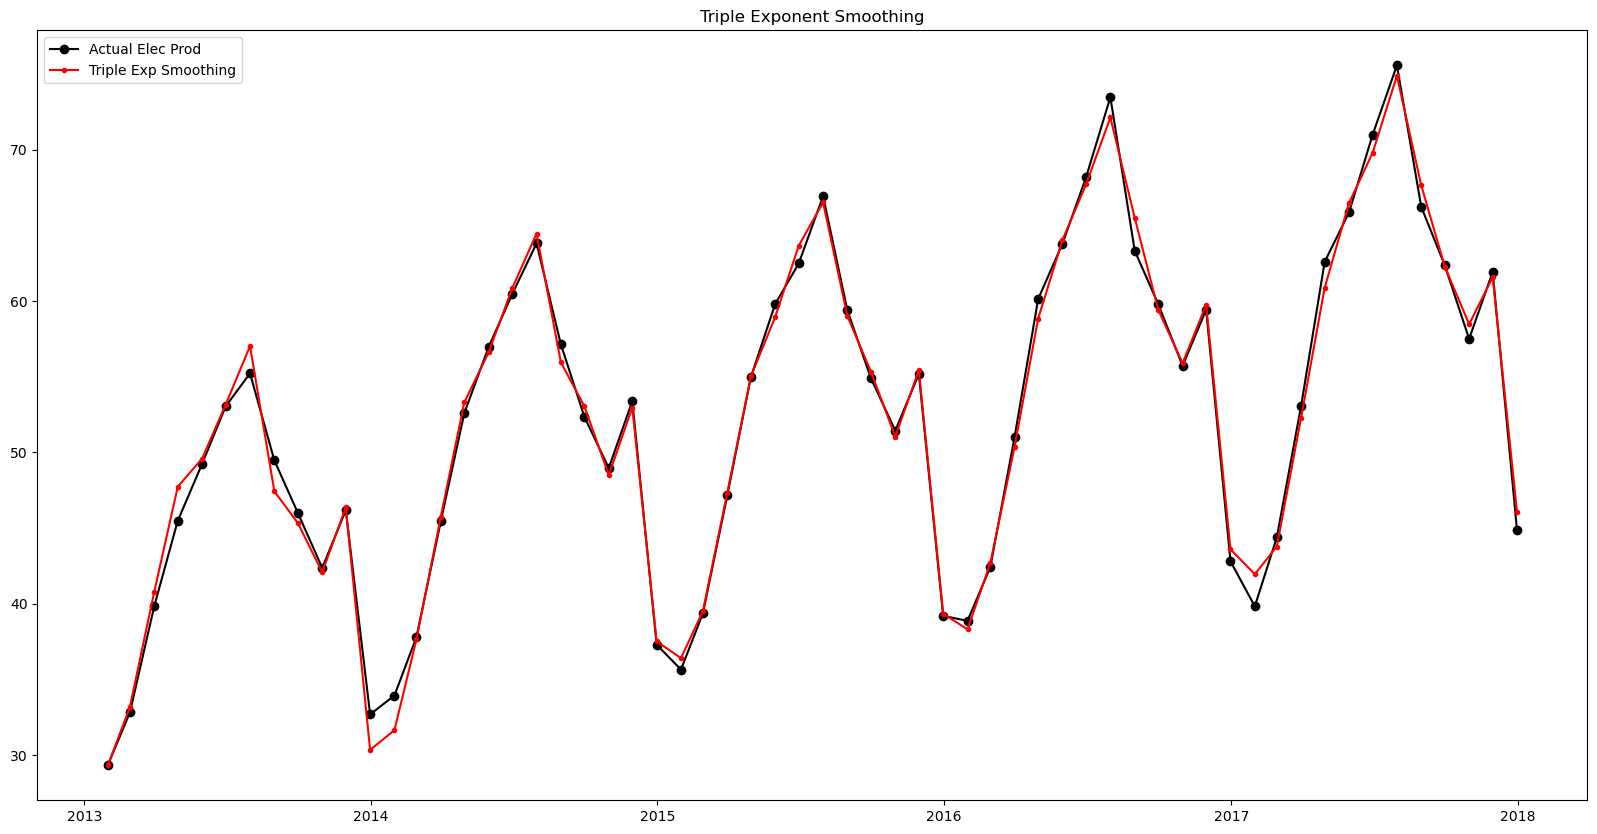

In [22]:
# plot the actual and triple smoothing values

ax=plt.subplots(figsize = (20,10))
plt.plot(data, marker='o', color='black', label='Actual Elec Prod')
plt.plot(model.fittedvalues, marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

#### Interpretation : From the visualization we can see that Triple Exponent Smoothing Technique work best for the dataset as graph is smoother  and closer to actual line than Double and Simple Exponent Smoothing Technique.
#### Also from Task 2, we have found that data has both trend and seasonality and Triple Exponent Smoothing Technique is used to smoothen the data that has both trend and seasonality.So Triple Exponent Smoothing will work best in order to forecast the sales.# 